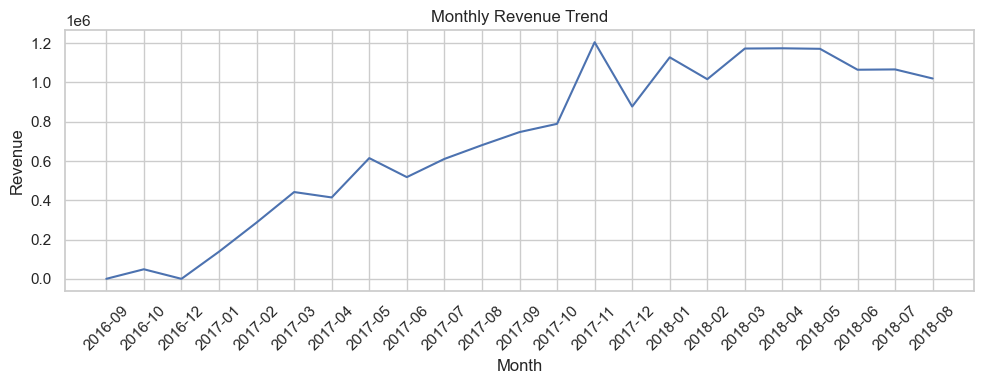

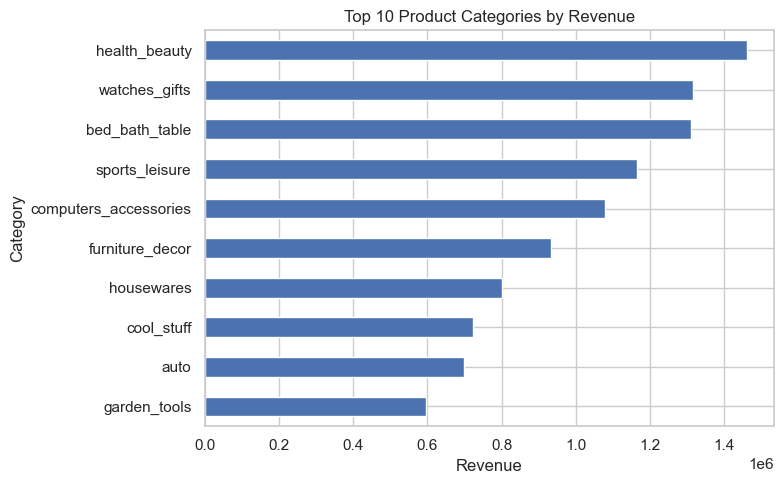

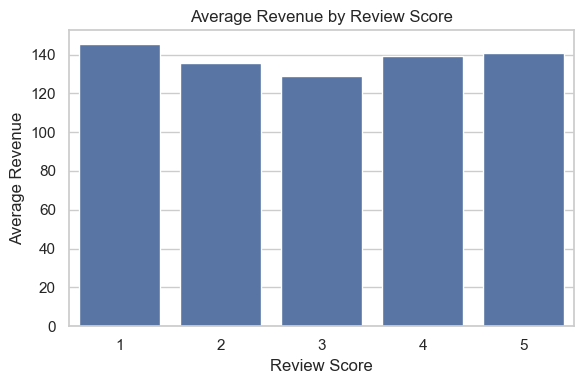

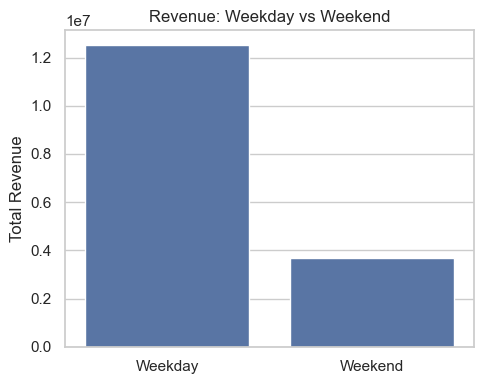

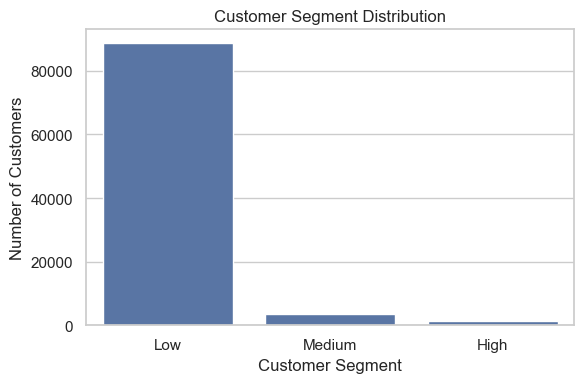

C:\Users\Brightpmk\AppData\Local\Temp\ipykernel_29360\368188693.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay["delay_days"] = (


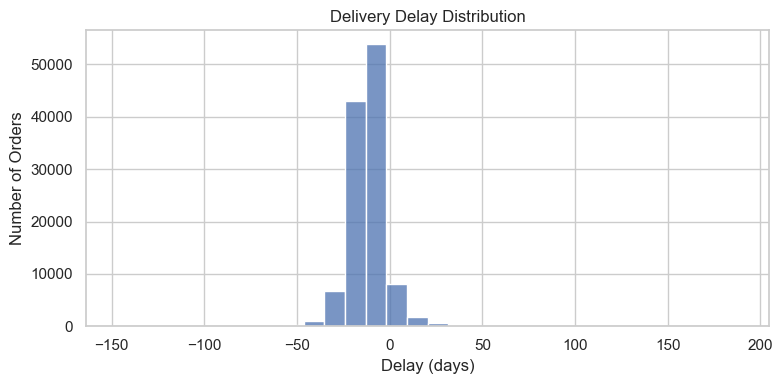

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("../data/processed/clean_olist_data.csv")


#monthly_revenue_trend
monthly = (
    df.groupby("order_month")["revenue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,4))
plt.plot(monthly["order_month"], monthly["revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")

plt.tight_layout()
plt.savefig("../outputs/figures/monthly_revenue_trend.png", dpi=200)
plt.show()

#Top 10 Categories by Revenue
top_cat = (
    df.groupby("product_category_name_english")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
top_cat.sort_values().plot(kind="barh")
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Category")

plt.tight_layout()
plt.savefig("../outputs/figures/top_categories_revenue.png", dpi=200)
plt.show()

#Review Score vs Revenue
review_rev = (
    df.groupby("review_score")["revenue"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=review_rev, x="review_score", y="revenue")
plt.title("Average Revenue by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Average Revenue")

plt.tight_layout()
plt.savefig("../outputs/figures/review_vs_revenue.png", dpi=200)
plt.show()

#Weekday vs Weekend Performance
df["day_type"] = df["order_weekday"].apply(
    lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday"
)

day_perf = (
    df.groupby("day_type")["revenue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(5,4))
sns.barplot(data=day_perf, x="day_type", y="revenue")
plt.title("Revenue: Weekday vs Weekend")
plt.xlabel("")
plt.ylabel("Total Revenue")

plt.tight_layout()
plt.savefig("../outputs/figures/weekday_vs_weekend.png", dpi=200)
plt.show()

#Customer Segmentation Distribution
cust_spend = (
    df.groupby("customer_unique_id")["revenue"]
    .sum()
    .reset_index()
)

cust_spend["segment"] = pd.cut(
    cust_spend["revenue"],
    bins=[0, 500, 1000, cust_spend["revenue"].max()],
    labels=["Low", "Medium", "High"]
)

plt.figure(figsize=(6,4))
sns.countplot(data=cust_spend, x="segment")
plt.title("Customer Segment Distribution")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.savefig("../outputs/figures/customer_segment_distribution.png", dpi=200)
plt.show()

#Delivery Delay Distribution
df_delay = df.dropna(
    subset=["order_delivered_customer_date", "order_estimated_delivery_date"]
)

df_delay["delay_days"] = (
    pd.to_datetime(df_delay["order_delivered_customer_date"])
    - pd.to_datetime(df_delay["order_estimated_delivery_date"])
).dt.days

plt.figure(figsize=(8,4))
sns.histplot(df_delay["delay_days"], bins=30)
plt.title("Delivery Delay Distribution")
plt.xlabel("Delay (days)")
plt.ylabel("Number of Orders")

plt.tight_layout()
plt.savefig("../outputs/figures/delivery_delay_distribution.png", dpi=200)
plt.show()